# 1. Introduction and Data Overview
This project explores the Heart Disease UCI dataset to identify key predictors and build models to predict the presence of heart disease. The dataset contains 918 observations and 12 primary variables, including demographic information (Age, Sex), health indicators (Cholesterol, RestingBP), and ECG test results. The target variable is HeartDisease, a binary label indicating whether a person has heart disease (1) or not (0). Categorical variables such as ChestPainType, RestingECG, and ExerciseAngina are encoded to prepare the dataset for modeling. Through a step-by-step workflow, we will analyze patterns, build machine learning models, and evaluate their performance.

In [ ]:
# 2. Load Raw Data and Import All Required Packages

In [3]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

warnings.filterwarnings("ignore")

# Scikit-learn tools
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Classifiers
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, ConfusionMatrixDisplay, RocCurveDisplay
)

In [4]:
# STEP 3 — Data Cleaning and Classification of Variables

# Load dataset
df = pd.read_csv("C:/Users/re/DSI/Heart-Failure-Prediction/raw_data/heart.csv")

# Show first few rows
display(df.head())

# Check for missing values
print(" Missing values per column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\n Duplicate rows:", df.duplicated().sum())

# Check data types
print("\n Data types of columns:")
print(df.dtypes)

# Quick summary statistics for numerical features
print("\n Summary statistics for numeric variables:")
display(df.describe())

# Classify variables
numerical_cols = ['age', 'restingbp', 'cholesterol', 'maxhr', 'oldpeak']
categorical_cols = ['chestpaintype', 'restingecg', 'st_slope']
binary_cols = ['sex', 'fastingbs', 'exerciseangina', 'heartdisease']

# Print categorized variable groups
print("\n📂 Variable Classification:")
print("Numerical:", numerical_cols)
print("Categorical:", categorical_cols)
print("Binary:", binary_cols)



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


 Missing values per column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

 Duplicate rows: 0

 Data types of columns:
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

 Summary statistics for numeric variables:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000



📂 Variable Classification:
Numerical: ['age', 'restingbp', 'cholesterol', 'maxhr', 'oldpeak']
Categorical: ['chestpaintype', 'restingecg', 'st_slope']
Binary: ['sex', 'fastingbs', 'exerciseangina', 'heartdisease']


In [5]:
# Descriptive statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [8]:
fig = px.scatter(
    df,
    x="Age",
    y="MaxHR",
    color="HeartDisease",
    trendline="ols",  
    hover_data=["Sex", "ChestPainType"],
    title="Regression of MaxHR vs Age Colored by Heart Disease"
)
fig.update_layout(template="plotly_white")
fig.show()


In [9]:
fig = px.scatter(
    df,
    x="Age",
    y="MaxHR",
    color="HeartDisease",
    trendline="ols",
    facet_col="Sex",
    title="MaxHR vs Age with Regression Line Faceted by Gender"
)
fig.show()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


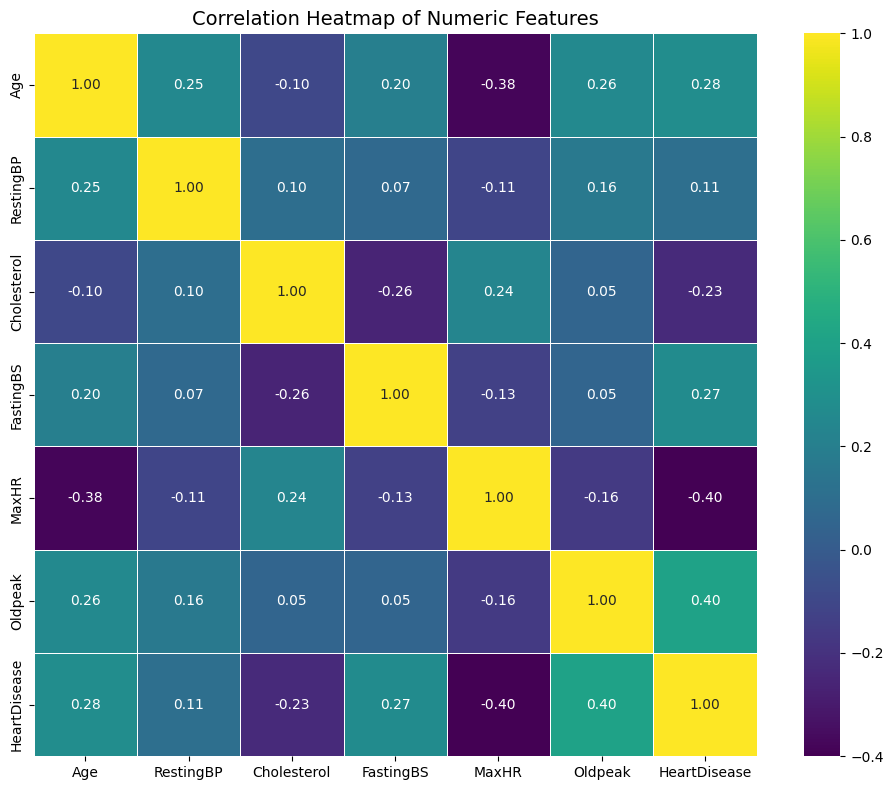

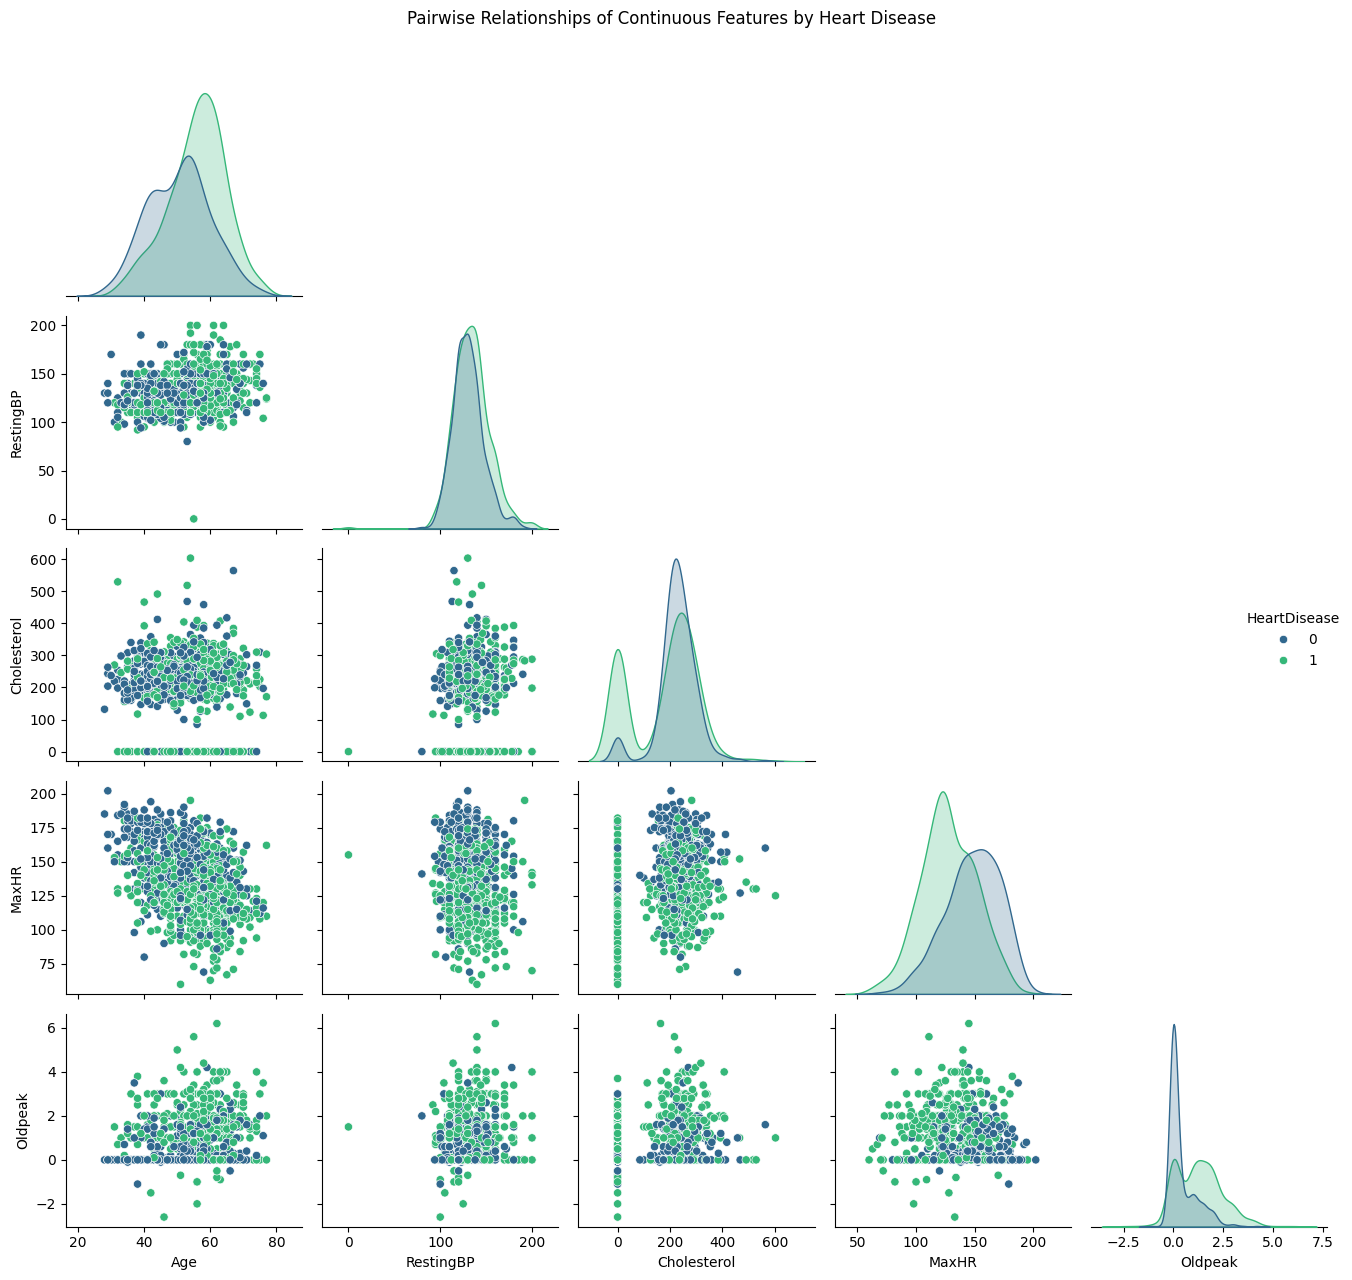

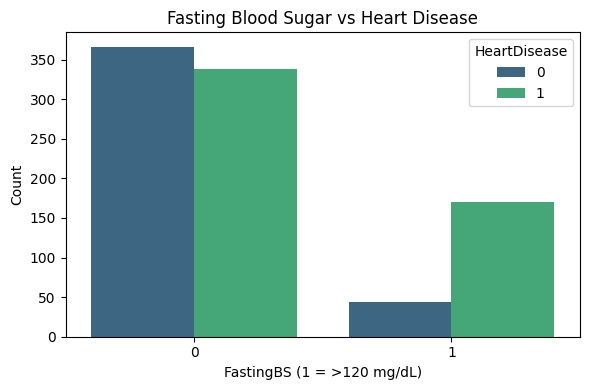

In [10]:
# --- Step 4: Summary Statistics and Visualizations ---



# 1. Summary statistics of all numeric variables
display(df.describe())

# 2. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(),
            annot=True,
            fmt=".2f",
            cmap='viridis',
            square=True,
            linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.tight_layout()
plt.show()

# 3. Pairplot (only continuous features), use 'viridis'-inspired palette
continuous_vars = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

sns.pairplot(df[continuous_vars + ['HeartDisease']],
             hue='HeartDisease',
             palette=sns.color_palette("viridis", n_colors=2),
             diag_kind='kde',
             corner=True)
plt.suptitle("Pairwise Relationships of Continuous Features by Heart Disease", y=1.02)
plt.tight_layout()
plt.show()

# 4. Violin Plot Example: Cholesterol by HeartDisease
fig = px.violin(df,
                y='Cholesterol',
                x='HeartDisease',
                color='HeartDisease',
                box=True,
                points='all',
                color_discrete_sequence=px.colors.sequential.Viridis,
                title='Cholesterol Distribution by Heart Disease',
                template='plotly_white')
fig.show()

# 5. Barplot for Categorical Variable (FastingBS)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='FastingBS', hue='HeartDisease', palette='viridis')
plt.title('Fasting Blood Sugar vs Heart Disease')
plt.xlabel('FastingBS (1 = >120 mg/dL)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



In [11]:

# --- 3. Exploratory Data Analysis (EDA) ---
# Load data
df = pd.read_csv("C:/Users/re/DSI/Heart-Failure-Prediction/raw_data/heart.csv")

# Create 'HeartFailure' column if not present
if 'HeartFailure' not in df.columns and 'HeartDisease' in df.columns:
    df['HeartFailure'] = df['HeartDisease']

# Optional: Clean extreme BP values
df_cleaned = df[(df['RestingBP'] >= 80) & (df['RestingBP'] <= 180)]

# Define custom color sequence: Blue, Yellow, Dark Blue
custom_colors = ['#1f77b4', '#ffcc00', '#0072B2']

# Plot
fig = px.scatter(
    df_cleaned,
    x='Age',
    y='MaxHR',
    color='RestingECG',
    size='MaxHR',
    labels={'Age': 'Age', 'MaxHR': 'Max Heart Rate'},
    template='plotly_dark',
    opacity=0.9,
    color_discrete_sequence=custom_colors,
    title='RestingECG vs Max Heart Rate — Colored Yellow & Blue by ECG Type'
)

fig.update_traces(marker=dict(line=dict(width=0.5, color='black')))
fig.update_layout(height=600)
fig.show()





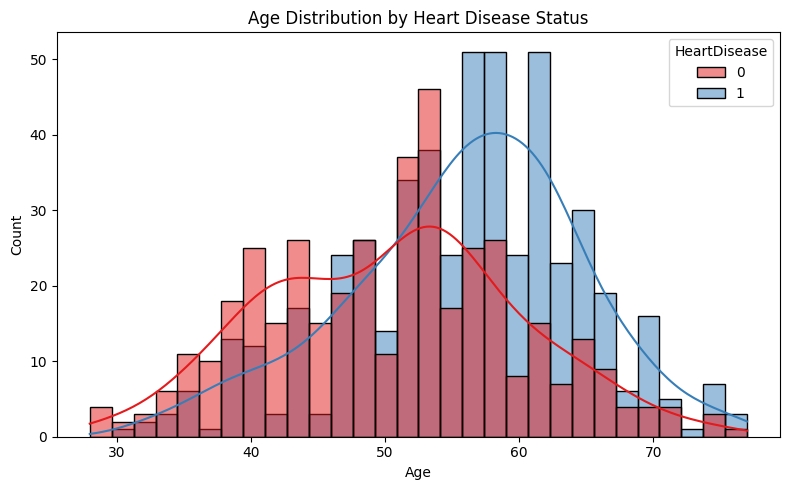

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Age", hue="HeartDisease", kde=True, bins=30, palette="Set1")
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [13]:

# Load your data
df = pd.read_csv("C:/Users/re/DSI/Heart-Failure-Prediction/raw_data/heart.csv")

# Check column casing (optional, can be removed if already verified)
df.columns = df.columns.str.upper()

# Create violin plot
fig = px.violin(
    df,
    y="AGE",
    x="EXERCISEANGINA",
    color="HEARTDISEASE",
    box=True,
    points="all",
    hover_data=df.columns
)

fig.update_layout(
    title_text="Violin Plot: Age Distribution by Exercise Angina and Heart Disease",
    yaxis_title="Age",
    xaxis_title="Exercise-Induced Angina (Y/N)"
)

fig.show()

In [15]:
# STEP 6

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# 1. Define X and y before encoding
y = df["HeartFailure"] if "HeartFailure" in df.columns else df["HeartDisease"]
X = df.drop(["HeartFailure"], axis=1) if "HeartFailure" in df.columns else df.drop(["HeartDisease"], axis=1)

# 2. Encode categorical variables (only on X)
X_encoded = pd.get_dummies(X, drop_first=True)

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Feature Scaling (Optional for tree models; keep for ML consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Fit Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

# 6. Plot Feature Importances
feature_df = pd.DataFrame({
    "Feature": X_encoded.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=True)

fig = px.bar(
    feature_df,
    x="Importance",
    y="Feature",
    orientation='h',
    title="Feature Importances — Random Forest",
    template="plotly_dark",
    color="Importance",
    color_continuous_scale=px.colors.sequential.Viridis
)
fig.update_layout(yaxis={'categoryorder': 'total ascending'}, height=650)
fig.show()



In [16]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load data
heart_df = pd.read_csv(r"C:\Users\re\DSI\Heart-Failure-Prediction\raw_data\heart.csv")

# 2. Select numeric features for PCA (correct column names)
features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'FastingBS']
X = heart_df[features]

# 3. Standardize the numeric features
X_scaled = StandardScaler().fit_transform(X)

# 4. Apply PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# 5. Create PCA results DataFrame
pca_df = pd.DataFrame(components, columns=['PC1', 'PC2'])
pca_df['Sex'] = heart_df['Sex']
pca_df['HeartDisease'] = heart_df['HeartDisease']

# 6. Calculate explained variance
explained_var = pca.explained_variance_ratio_ * 100
pc1_label = f"PC1 ({explained_var[0]:.2f}%)"
pc2_label = f"PC2 ({explained_var[1]:.2f}%)"

# 7. Create PCA plot
fig = px.scatter(
    pca_df,
    x='PC1',
    y='PC2',
    color='Sex',
    symbol='HeartDisease',
    title='2D PCA: Heart Disease Dataset',
    labels={'PC1': pc1_label, 'PC2': pc2_label},
    template='plotly_dark',
    opacity=0.8,
    color_discrete_map={'F': 'orange', 'M': 'red'}
)

# 8. Add PCA loadings as arrows
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref='x', ayref='y',
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=3,
        arrowhead=3,
        arrowcolor='white'
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        text=feature,
        showarrow=False,
        font=dict(color='white'),
        xanchor='center',
        yanchor='bottom'
    )

# 9. Show plot
fig.show()


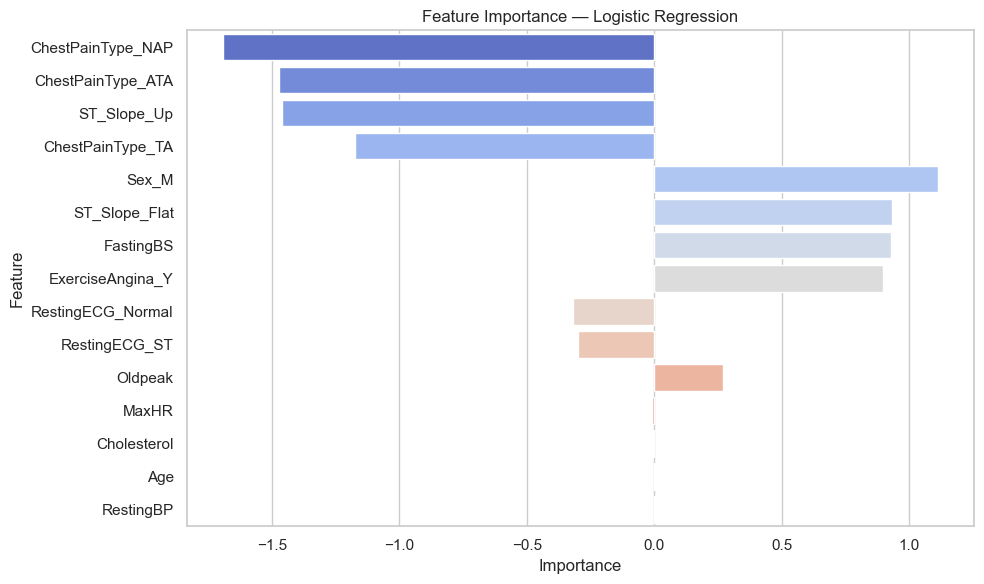

In [17]:
from sklearn.linear_model import LogisticRegression


# Fit logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Create feature importance DataFrame
lr_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lr.coef_[0]
}).sort_values(by='Importance', key=abs, ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=lr_importance, x='Importance', y='Feature', palette='coolwarm')
plt.title('Feature Importance — Logistic Regression')
plt.tight_layout()
plt.show()
